- В предположении, что данный массив из 50 элементов получен<br>
из нормально распределённой генеральной совокупности <br>
с неизвестными m и sigma^2, построить доверительные интервалы <br>
для математического ожидания и дисперсии при доверительной <br>
вероятности, равной 0,95 <br>
(рассмотреть случаи негруппированной и группированной выборок)

In [1310]:
import numpy as np
import scipy.stats as sts
import scipy as sci

import statsmodels.api as sm
import statsmodels.stats.weightstats as wsts

import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

# данная выборка
val_list = [
1.88,
-1.58,
4.84,
1.08,
5.59,
7.34,
3.86,
0.22,
4.00,
2.73,
6.23,
17.23,
2.47,
-2.10,
-1.42,
7.44,
7.27,
9.02,
9.86,
7.20,
-4.50,
2.51,
3.27,
5.94,
0.42,
4.37,
5.51,
2.09,
9.04,
-0.35,
2.14,
6.76,
-0.43,
8.30,
12.00,
4.27,
0.89,
-1.04,
5.11,
3.25,
6.42,
6.41,
10.65,
4.22,
2.57,
2.49,
5.28,
3.10,
2.71,
1.94
]

In [1311]:
# Негруппированная выборка
# Доверительная вероятность
beta = 0.95

# Размер выборки
n = len(val_list)

# Среднее значение выборки
x_mean = np.mean(val_list)

# Стандартная ошибку среднего
s = np.std(val_list, ddof=1)

# Критическое значение t-статистики для доверительной вероятности 0.95
t_value = sts.t.ppf((1 + beta) / 2, n - 1)

# Найдем доверительный интервал для математического ожидания
ci_mean = [x_mean - t_value * s / np.sqrt(n), x_mean + t_value * s / np.sqrt(n)]

# Найдем критическое значение хи-квадрат распределения для доверительной вероятности 0.95
chi2_value1 = sts.chi2.ppf((1 + beta) / 2, n-1)
chi2_value2 = sts.chi2.ppf((1 - beta) / 2, n-1)

# Найдем доверительный интервал для дисперсии
ci_var = [(n-1) * s**2 / chi2_value1, (n-1) * s**2 / chi2_value2]

print(f'Доверительный интервал для математического ожидания: {ci_mean}')
print(f'Доверительный интервал для дисперсии: {ci_var}')

Доверительный интервал для математического ожидания: [3.0397680085353067, 5.300231991464695]
Доверительный интервал для дисперсии: [11.03613448527826, 24.559849521924402]


4.170000000000001

In [1312]:
# Построение группированной выборки
freq_intervals_tab = []

min_val = min(val_list)
max_val = max(val_list)

hist, bins = np.histogram(val_list, bins=7, range=(min_val, max_val), weights=None, density= None)

for i in range(0, len(hist)):
    freq_intervals_tab.append([bins[i], bins[i + 1], hist[i]])

group_val_list = []

for i in range(0, len(freq_intervals_tab)):
    x = (freq_intervals_tab[i][0] + freq_intervals_tab[i][1]) / 2
    for j in range(freq_intervals_tab[i][2]):
        group_val_list.append(x)

In [1313]:
# Негруппированная выборка
# Размер выборки
n = len(group_val_list)

# Среднее значение выборки
x_mean_group = np.mean(group_val_list)

# Стандартная ошибку среднего
s_group = np.std(group_val_list, ddof=1)

# Критическое значение t-статистики для доверительной вероятности 0.95
t_value_gr = sts.t.ppf((1 + beta) / 2, n - 1)

# Найдем доверительный интервал для математического ожидания
ci_mean_gr = [x_mean_group - t_value_gr * s_group / np.sqrt(n), x_mean_group + t_value_gr * s_group / np.sqrt(n)]

# Найдем критическое значение хи-квадрат распределения для доверительной вероятности 0.95
chi2_value1_gr = sts.chi2.ppf((1 + beta) / 2, n-1)
chi2_value2_gr = sts.chi2.ppf((1 - beta) / 2, n-1)

# Найдем доверительный интервал для дисперсии
ci_var_gr = [(n-1) * s_group**2 / chi2_value1_gr, (n-1) * s_group**2 / chi2_value2_gr]

print(f'Доверительный интервал для математического ожидания (группированная): {ci_mean_gr}')
print(f'Доверительный интервал для дисперсии (группированная): {ci_var_gr}')

Доверительный интервал для математического ожидания (группированная): [3.149016191666151, 5.359155236905279]
Доверительный интервал для дисперсии (группированная): [10.550207346680079, 23.478465689703935]


- проверить (с помощью построенных доверительных интервалов) гипотезы<br>
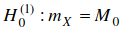 <br>
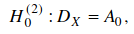 <br>


In [1314]:
select_mean, p_val = sts.ttest_1samp(val_list, x_mean + 0.5 * s)

print(f'Выборочное мат ожидание M0 = {round(select_mean, 3)} не попадает в доверительный интервал {ci_mean}')
print(f'т. о. гипотеза не подтверждается.')

Выборочное мат ожидание M0 = -3.536 не попадает в доверительный интервал [3.0397680085353067, 5.300231991464695]
т. о. гипотеза не подтверждается.


In [1315]:
select_var = s**2 / ((2 * s**2) / (n - 1))

print(f'Выборочная дисперсия A0 = {round(select_var, 3)} попадает в доверительный интервал {ci_var}')
print(f'т. о. гипотеза подтверждается.')

Выборочная дисперсия A0 = 24.5 попадает в доверительный интервал [11.03613448527826, 24.559849521924402]
т. о. гипотеза подтверждается.


- вычислить статистику chi^2 для проверки гипотезы о нормальном распределении генеральной<br>
совокупности (число интервалов группировки равно семи, уровень значимости α = 0.05 )

In [1316]:
# Частоты гипопетичкеского распределения
nipi = []

for i in range(0, len(hist)):
    nipi.append(4.4325068 * hist[i] *  (sts.norm.cdf((bins[i+1] - x_mean)/s) - sts.norm.cdf((bins[i] - x_mean)/s)))

# Проверка гипотезы
stat, p_dist_par = sts.chisquare(hist, f_exp=nipi, ddof=2, axis=0)

if (0.05 > p_dist_par):
    print('Гипотеза о нормальном распределении не подтверждается\nпри зададанном уровне значимости а = 0.05')

Гипотеза о нормальном распределении не подтверждается
при зададанном уровне значимости а = 0.05


Проанализировать три выборки объёмом 200 из генеральных совокупностей, имеющих <br>
экспоненциальное, нормальное и равномерное распределения (по одной выборке каждого из трёх указанных <br>
видов распределений)<br>

In [1317]:
# параметры нормального распределения
m = 20
sig = np.sqrt(20)

norm_val_list = np.random.normal(m, sig, 200)

# параметры экспоненциального распределения
lambd = 4

exp_val_list = np.random.exponential(4, 200)

# параметры равномерного распределения
a = 20 # минимальный элемент распределения
b = a * 2 # максимальный элемент распределения

uni_val_list = np.random.uniform(a, b, 200)

– найти выборочное среднее и несмещённую оценку дисперсии<br><br>
– построить гистограммы относительных частот (сделать семь интервалов группировки)<br><br>
– получить таблицы частот<br><br>
– выдвинуть гипотезы о законах распределения генеральных совокупностей,<br>представленных этими массивами


Таблица частот группированной нормальной выборки:
   from       to    freq
-------  -------  ------
10.2207  13.1909       9
13.1909  16.1611      20
16.1611  19.1313      47
19.1313  22.1016      59
22.1016  25.0718      44
25.0718  28.042       15
28.042   31.0122       6

Выборочное среднее нормального распределения: 20.288
Несмещенная оценка дисперсии нормального распределения: 15.685

Гипотеза о нормальном распределении подтверждается
при зададанном уровне значимости а < 3.21742876883977e-19


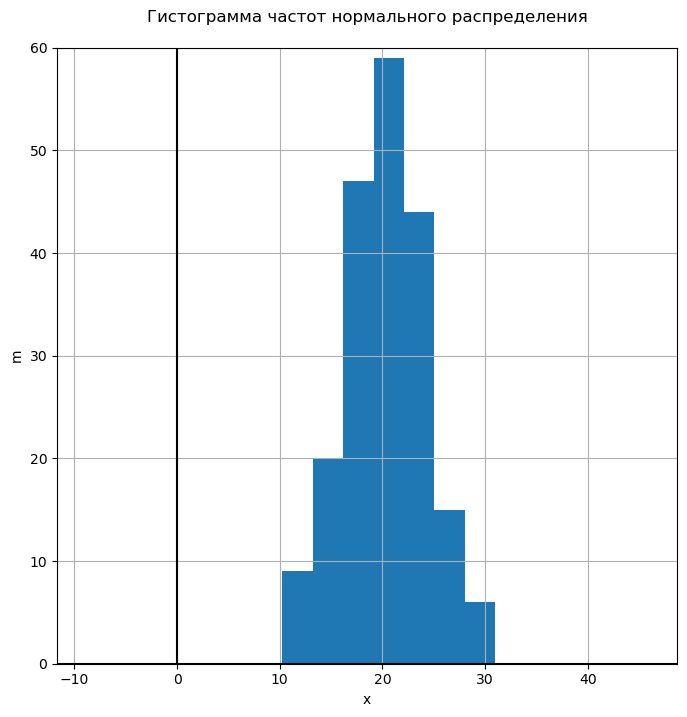

In [1318]:
# Таблица частот нормального распределения

freq_tab_norm = []

min_val = min(norm_val_list)
max_val = max(norm_val_list)

hist, bins = np.histogram(norm_val_list, bins=7, range=(min_val, max_val), weights=None, density= None)

for i in range(0, len(hist)):
    freq_tab_norm.append([bins[i], bins[i + 1], hist[i]])

print('Таблица частот группированной нормальной выборки:')
print(tabulate(freq_tab_norm, headers=['from', 'to', 'freq']))
print()

# ___________________________________________________________________________________________

# Нахождение параметров
mean = np.mean(norm_val_list)
s =  np.std(norm_val_list, ddof=1)
print('Выборочное среднее нормального распределения:', round(mean, 3))
print('Несмещенная оценка дисперсии нормального распределения:', round(s**2, 3))
print()

# ___________________________________________________________________________________________

# Частоты гипопетичкеского распределения
# nipi = []

# for i in range(0, len(hist)):
#     nipi.append(hist[i] * (sts.norm.cdf((bins[i+1] - x_mean)/s) - sts.norm.cdf((bins[i] - x_mean)/s)))

# Проверка гипотезы
# stat, p_dist_par = sts.chisquare(hist, f_exp=nipi, ddof=2, axis=0)
stat, p_dist_par = sts.chisquare(hist, ddof=2, axis=0)


print(f'Гипотеза о нормальном распределении подтверждается\nпри зададанном уровне значимости а < {p_dist_par}')

# ___________________________________________________________________________________________

# Построение гистограммы для нормального распределения
fig = plt.figure(figsize=(8, 8))

plt.title('Гистограмма частот нормального распределения\n')

plt.xlabel('x')
plt.ylabel('m')

plt.grid()

plt.axis('equal')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.axis([6, 31, 0, 60])

h = plt.hist(norm_val_list, bins=bins, range=(min_val, max_val), density=None, weights=None, 
                cumulative=False, histtype='bar',
                align='mid', orientation='vertical',
                log=False, color=None)

Таблица частот группированной экспоненциальной выборки:
       from        to    freq
-----------  --------  ------
 0.00171001   3.2192      104
 3.2192       6.4367       54
 6.4367       9.65419      21
 9.65419     12.8717       10
12.8717      16.0892       10
16.0892      19.3067        0
19.3067      22.5242        1

Выборочное среднее экспоненциального распределения: 4.033
Несмещенная оценка дисперсии экспоненциального распределения: 15.184

Гипотеза о экспоненциальном распределении подтверждается
при зададанном уровне значимости а < 2.169254413161536e-63


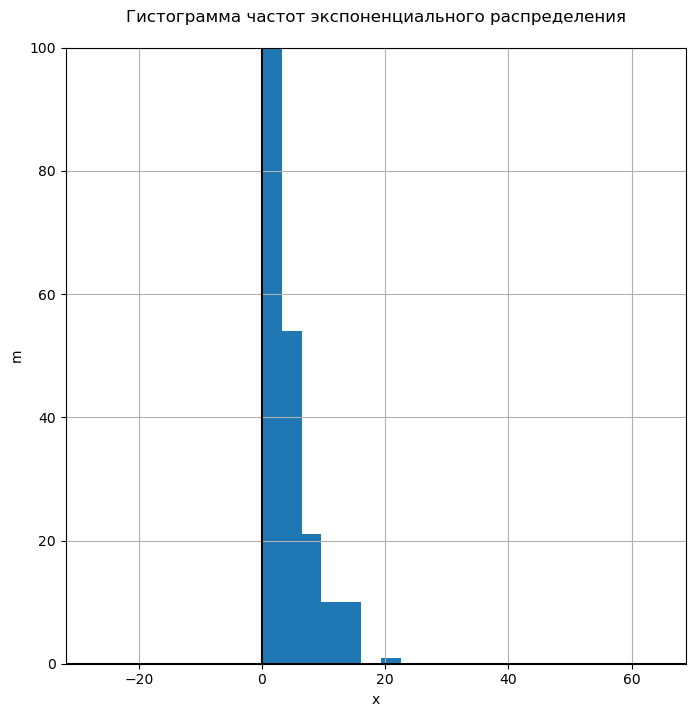

In [1319]:
# Таблица частот экспоненциального распределения

freq_tab_exp = []

min_val = min(exp_val_list)
max_val = max(exp_val_list)

hist, bins = np.histogram(exp_val_list, bins=7, range=(min_val, max_val), weights=None, density= None)

for i in range(0, len(hist)):
    freq_tab_exp.append([bins[i], bins[i + 1], hist[i]])

print('Таблица частот группированной экспоненциальной выборки:')
print(tabulate(freq_tab_exp, headers=['from', 'to', 'freq']))
print()

# ___________________________________________________________________________________________

# Нахождение параметров
mean = np.mean(exp_val_list)
s =  np.std(exp_val_list, ddof=1)
print('Выборочное среднее экспоненциального распределения:', round(mean, 3))
print('Несмещенная оценка дисперсии экспоненциального распределения:', round(s**2, 3))
print()

# ___________________________________________________________________________________________

# Частоты гипопетичкеского распределения
# nipi = []

# for i in range(0, len(hist)):
    # nipi.append(hist[i] * (1 - np.exp(bins[i + 1] * -lambd) - 1 + np.exp(bins[i] * -lambd)))

# Проверка гипотезы
# stat, p_dist_par = sts.chisquare(hist, f_exp=nipi, ddof=1, axis=0)
stat, p_dist_par = sts.chisquare(hist, ddof=1, axis=0)

print(f'Гипотеза о экспоненциальном распределении подтверждается\nпри зададанном уровне значимости а < {p_dist_par}')
# ___________________________________________________________________________________________


# Построение гистограммы для нормального распределения
fig = plt.figure(figsize=(8, 8))

plt.title('Гистограмма частот экспоненциального распределения\n')

plt.xlabel('x')
plt.ylabel('m')

plt.grid()

plt.axis('equal')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.axis([6, 31, 0, 100])

h = plt.hist(exp_val_list, bins=bins, range=(min_val, max_val), density=None, weights=None, 
                cumulative=False, histtype='bar',
                align='mid', orientation='vertical',
                log=False, color=None)

Таблица частот группированной равномерной выборки:
   from       to    freq
-------  -------  ------
20.3719  23.1636      28
23.1636  25.9554      23
25.9554  28.7471      16
28.7471  31.5388      24
31.5388  34.3306      34
34.3306  37.1223      42
37.1223  39.914       33

Выборочное среднее равномерного распределения: 31.101
Несмещенная оценка дисперсии равномерного распределения: 33.574

Гипотеза о равномерном распределении подтверждается
при зададанном уровне значимости а < 0.008819652550740133



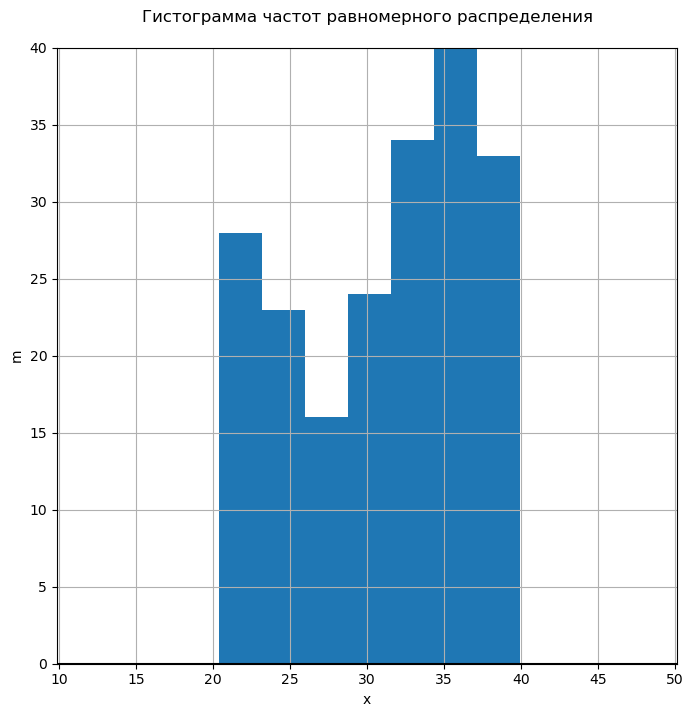

In [1320]:
# Таблица частот равномерного распределения

freq_tab_uni = []

min_val = min(uni_val_list)
max_val = max(uni_val_list)

hist, bins = np.histogram(uni_val_list, bins=7, range=(min_val, max_val), weights=None, density= None)

for i in range(0, len(hist)):
    freq_tab_uni.append([bins[i], bins[i + 1], hist[i]])

print('Таблица частот группированной равномерной выборки:')
print(tabulate(freq_tab_uni, headers=['from', 'to', 'freq']))
print()

# ___________________________________________________________________________________________

# Нахождение параметров
mean = np.mean(uni_val_list)
s =  np.std(uni_val_list, ddof=1)
print('Выборочное среднее равномерного распределения:', round(mean, 3))
print('Несмещенная оценка дисперсии равномерного распределения:', round(s**2, 3))
print()

# ___________________________________________________________________________________________

# Частоты гипопетичкеского распределения
# nipi = []

# for i in range(0, len(hist)):
    # nipi.append(hist[i] * ((bins[i + 1] - a) / (b - a) - (bins[i] - a) / (b - a)))

# Проверка гипотезы
# stat, p_dist_par = sts.chisquare(hist, f_exp=nipi, ddof=1, axis=0)
stat, p_dist_par = sts.chisquare(hist, ddof=1, axis=0)

print(f'Гипотеза о равномерном распределении подтверждается\nпри зададанном уровне значимости а < {p_dist_par}')
print()

# ___________________________________________________________________________________________


# Построение гистограммы для нормального распределения
fig = plt.figure(figsize=(8, 8))

plt.title('Гистограмма частот равномерного распределения\n')

plt.xlabel('x')
plt.ylabel('m')

plt.grid()

plt.axis('equal')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.axis([15, 45, 0, 40])

h = plt.hist(uni_val_list, bins=bins, range=(min_val, max_val), density=None, weights=None, 
                cumulative=False, histtype='bar',
                align='mid', orientation='vertical',
                log=False, color=None)